<a href="https://colab.research.google.com/github/sugatoray/CodeSnippets/blob/master/notebooks/example_tikzplotlib_matplotlib-to-latex-tikz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Summary**

This is an attempt to show the use of [`tikzplotlib`](https://pypi.org/project/tikzplotlib/) library and use matplotlib code to make a plot and then convert the matplotlib (python) code into its PGFPlot (PGF/TikZ) equivalent form as valid LaTeX.

### **Motivation** 

I came across a question on `tex.stackexchange.com` and wondered if matplotlib plots could be converted in TikZ (LaTeX). This notebook is an example showing how to do this with the help of `tikzplotlib`.

  - [Pgfpolts on function composition problem](https://tex.stackexchange.com/questions/618605/pgfpolts-on-function-composition-problem)

## Installations

This takes about 2-3 minutes. So, make be get yourself a cup of coffee! 🍵

- `LaTeX`
- `Tikzplotlib`

In [26]:
#@title Install LaTeX
%%capture
# Takes about 2-3 minutes to install
# source: https://learnsharewithdp.wordpress.com/2020/05/08/latex-matplotlib-google-colab/
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 

!apt install cm-super

In [42]:
#@title Install Tikzplotlib
%%capture
# source: https://pypi.org/project/tikzplotlib/
! pip install -U tikzplotlib

## Setting up Matplotlib Backend and Options

Source: https://matplotlib.org/stable/tutorials/text/usetex.html

```
font.family        : serif
font.serif         : Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
font.sans-serif    : Helvetica, Avant Garde, Computer Modern Sans Serif
font.cursive       : Zapf Chancery
font.monospace     : Courier, Computer Modern Typewriter

text.usetex        : true
```

In [43]:
import numpy as np
import matplotlib.pylab as plt
import tikzplotlib

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina' 
plt.style.use('seaborn-white')

# Use LaTeX for Plot-Labels
# source: https://matplotlib.org/stable/tutorials/text/usetex.html
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica"],
    },
)

## Create Data to Plot

In [28]:
def f(x: np.ndarray) -> np.ndarray:
    # This is your function: y = sin(2*x - 5/3)
    return np.sin(2*x - 5/3)

In [35]:
x = np.linspace(-np.pi*2, np.pi*2, 1000)
y = f(x)

## Create Plot

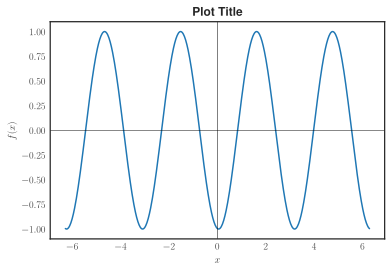

In [45]:
fig, ax = plt.subplots()
plt.sca(ax)
plt.plot(x, y)
#ax.set_aspect('equal')
#ax.grid(True, which='both')

ax.axhline(y=0, color='k', lw=0.5)
ax.axvline(x=0, color='k', lw=0.5)

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('$\\textbf{Plot Title}$')
#plt.show()
tikzplotlib.clean_figure(target_resolution=600)
tikzplotlib.save("test.tex", flavor="context")
plt.show()

## Grab (download) the generated `.tex` file

- We have saved the file as `test.tex`. If you run the following code block (after uncommenting it), you will be able to see the contents of the `.tex` file. 

- Click the folder icon 📂 on the left control-bar in colab and then you can find the `test.tex` file. 

- Right click on the file and download it.

In [49]:
#! cat test.tex